In [1]:
import sys
import torch
import torch.nn.functional as F
from torch.utils.data import Subset
from torchvision.utils import save_image
import torchvision.models as tvmodels
from torchvision import datasets, transforms

import segmentation_models_pytorch as smp

import numpy as np

import matplotlib.pyplot as plt

sys.path.insert(0, "../src")
import exlib
from exlib.explainers import *
from exlib.explainers.common import *
from exlib.modules import *
from exlib.datasets.abdomen_organs import *

In [2]:
DATA_DIR = "/home/antonxue/foo/data/abdomen_exlib/"
train_dataset = AbdomenOrgans(data_dir=DATA_DIR, split="train")
test_dataset = AbdomenOrgans(data_dir=DATA_DIR, split="test")

In [3]:
seg_model = AbdomenSegModel(in_channels=3, num_segments=4)
seg_model.eval()

cls_model = AbdomenClsModel(in_channels=3, num_classes=6)
cls_model.eval()

seg2cls_model = Seg2ClsWrapper(seg_model)
seg2cls_model.eval()
;

''

In [4]:
x, olabel, glabel = test_dataset[0]
X = torch.stack([x, x, x])
y_cls = cls_model(X)
y_seg = seg_model(X)
y_seg2cls = seg2cls_model(X)

y_cls.shape, y_seg.shape, y_seg2cls.shape

(torch.Size([3, 6]), torch.Size([3, 4, 384, 640]), torch.Size([3, 4]))

In [5]:

intg_cls = IntGradImageCls(cls_model)
intg_seg = IntGradImageSeg(seg_model)                       

# lime_cls = LimeImageCls(cls_model)
# lime_seg = LimeImageSeg(seg_model)
# lime_cls_old = TorchImageLime(cls_model)

In [6]:
intg_cls_exp = intg_cls(X, T=[0,1,2], progress_bar=True)

100%|██████████| 32/32 [00:00<00:00, 32.77it/s]


In [7]:
intg_seg_exp = intg_seg(X, T=[0,1,2], progress_bar=True)

100%|██████████| 32/32 [01:07<00:00,  2.12s/it]


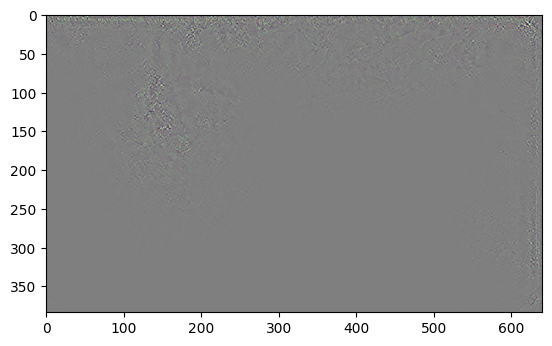

In [16]:
plt.imshow(intg_seg_exp.attributions[0].sigmoid().numpy().transpose(1,2,0))

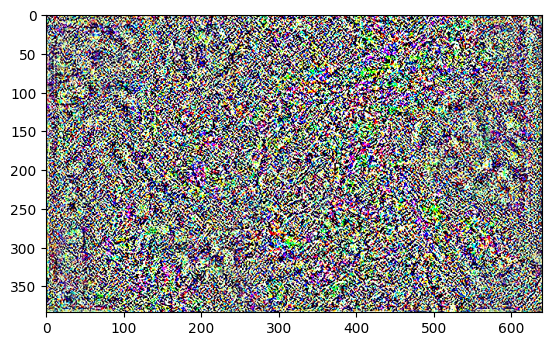

In [17]:
plt.imshow(intg_seg_exp.attributions[1].sigmoid().numpy().transpose(1,2,0))

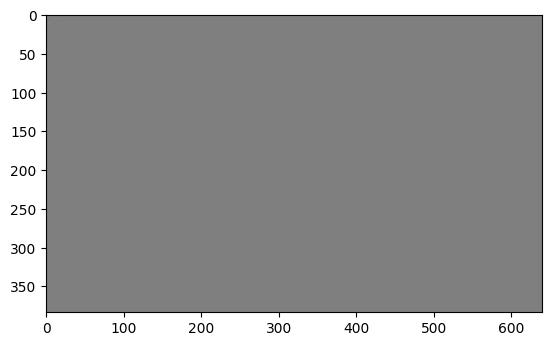

In [18]:
plt.imshow(intg_seg_exp.attributions[2].sigmoid().numpy().transpose(1,2,0))

In [ ]:
########################################
########################################
########################################

In [ ]:
cls_model = AbdomenClsModel(3, 6)

In [ ]:
X = torch.stack([x,x,x])
y = cls_model(X)
y

In [ ]:
# Try an explainer

In [ ]:
# explainer = IntGradImageSeg(model)
intg_cls = IntGradImageCls(cls_model)
intg_seg = IntGradImageSeg(model)                       

lime_cls = LimeImageCls(cls_model)
lime_seg = LimeImageSeg(model)
lime_cls_old = TorchImageLime(cls_model)

In [ ]:
intg_cls_exp = intg_cls(X, label=[0,1,2])

In [ ]:
intg_cls_seg = intg_seg(X, label=[0,1,2])

In [ ]:
lime_cls_exp = lime_cls(X, label=[0,1,2])

In [ ]:
lime_seg_exp = lime_seg(X, label=[0,1,2])

In [ ]:
lime_cls_old_exp = lime_cls_old(X, label=None)

In [ ]:
lime_seg_exp.attributions[0].sum(), lime_seg_exp.attributions[1].sum()

In [ ]:
plt.imshow(lime_seg_exp.attributions[0].numpy())

In [ ]:
plt.imshow(lime_seg_exp.attributions[1].numpy())

In [ ]:
plt.imshow(lime_seg_exp.attributions[2].numpy())

In [ ]:
#####

In [ ]:
shap_cls = TorchImageSHAP(cls_model)

In [ ]:
shap_cls_exp = shap_cls(X)

In [ ]:
shap_cls_exp.attributions.reshape(-1).sort()